# K- means

Zbiór danych: https://www.kaggle.com/datasets/abdullah0a/human-age-prediction-synthetic-dataset

Cel biznesowy: stowrzyć grupy pacjentów, w celu optymalizacji obsługi

Dokumentacja: https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format

In [2]:
# puść ten kod, 
# jeżeli wywołujesz plik  w folderze rozwiąznaia, 
# a ramka danych znajduje się w folderze data
import os 
os.chdir('../')

In [3]:
# Wczytanie danych
df = pd.read_csv("data/Train.csv")

In [3]:
# Wybór zmiennych numerycznych
df_numerical = df.select_dtypes(exclude='object')

In [4]:
# Describe
df_numerical.describe()

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
count,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000
mean,168.591,72.537,234.030,25.550,126.654,0.932,0.475,47.016,63.868,5.477,5.029,5.956,53.486
std,9.293,13.191,24.521,4.367,18.226,0.444,0.210,14.336,11.756,2.585,2.871,3.475,20.570
min,141.131,32.538,148.812,12.050,69.867,-0.220,0.200,0.000,30.382,1.000,0.006,0.002,18.000
25%,161.630,63.223,216.757,22.454,114.393,0.561,0.282,36.735,55.648,3.222,2.607,2.873,36.000
50%,168.216,71.449,234.377,25.352,126.802,0.940,0.462,46.964,64.015,5.497,5.096,5.957,53.000
75%,175.523,81.703,250.647,28.404,139.377,1.295,0.639,56.829,72.087,7.680,7.476,8.991,72.000
max,198.112,123.599,331.301,43.330,185.736,2.000,1.063,94.004,106.480,9.996,9.998,11.993,89.000


In [5]:
# normalizacja
df_scaled = StandardScaler().fit_transform(df_numerical)
df_scaled = pd.DataFrame(data=df_scaled, columns = df_numerical.columns)
df_scaled.head()

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
0,0.275,1.035,1.037,0.887,1.701,-1.802,-1.310,0.821,-1.685,-1.037,0.039,0.332,1.727
1,0.469,0.539,1.207,0.247,-0.447,-0.682,-0.988,0.532,-1.579,1.495,0.782,-0.586,1.143
2,-1.361,-1.772,-1.068,-1.221,0.929,-1.034,-1.077,0.527,-0.648,1.454,1.209,-0.162,0.803
3,0.052,-1.253,0.785,-1.364,0.592,0.569,0.187,2.282,-0.738,-0.303,0.880,-0.924,-0.072
4,-0.520,0.108,0.085,0.465,1.025,-1.121,-0.800,0.381,-0.923,-0.556,1.533,-0.598,1.241


In [6]:
# Describe po normalizacji
df_scaled.describe()

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
count,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000
mean,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.955,-3.033,-3.476,-3.092,-3.116,-2.597,-1.310,-3.280,-2.849,-1.732,-1.749,-1.714,-1.725
25%,-0.749,-0.706,-0.705,-0.709,-0.673,-0.836,-0.920,-0.717,-0.699,-0.872,-0.844,-0.887,-0.850
50%,-0.040,-0.083,0.014,-0.045,0.008,0.017,-0.060,-0.004,0.012,0.008,0.023,0.000,-0.024
75%,0.746,0.695,0.678,0.653,0.698,0.818,0.786,0.685,0.699,0.853,0.852,0.874,0.900
max,3.177,3.872,3.967,4.072,3.242,2.408,2.804,3.278,3.625,1.749,1.731,1.738,1.727


In [8]:
# kolumny do modelu
x_cols = ['Cholesterol Level (mg/dL)','Blood Glucose Level (mg/dL)']

In [9]:
# model
k_means = KMeans(n_clusters=4, random_state=123).fit(df_scaled[x_cols])

In [10]:
# parametru modelu
k_means.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'auto',
 'random_state': 123,
 'tol': 0.0001,
 'verbose': 0}

In [11]:
# Suma odległości od centroidów
-k_means.score(df_scaled[x_cols])

2059.2326211673835

In [13]:
# inaczej 
k_means.inertia_

2059.2326211673835

In [14]:
# Współrzędne centroidów
k_means.cluster_centers_

array([[ 0.39125328, -0.79532749],
       [-0.42271332,  0.82862906],
       [-1.15233751, -0.75001619],
       [ 1.17971209,  0.72655879]])

In [15]:
# Predykcja zwraca przypisanie do klastra
k_means.predict(df_scaled[x_cols])

array([3, 0, 1, ..., 0, 2, 3], dtype=int32)

In [16]:
# Przypisanie zbioru uczącego
k_means.labels_

array([3, 0, 1, ..., 0, 2, 3], dtype=int32)

In [18]:
# Dodanie klastra do zbioru
df_scaled['cluster'] = k_means.labels_
df_numerical['cluster'] = k_means.labels_

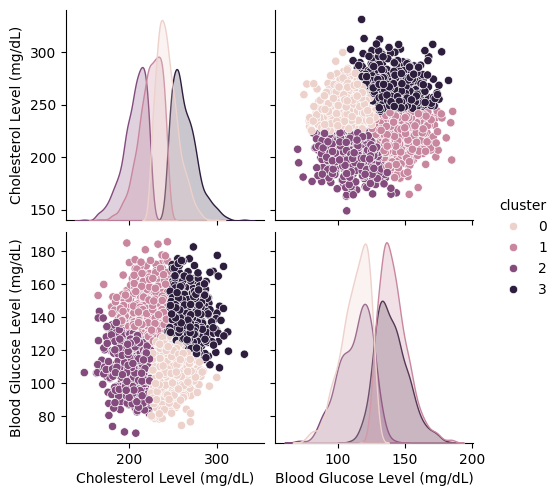

In [19]:
# Pairplot
sns.pairplot(data=df_numerical[x_cols + ['cluster']], hue = 'cluster')
plt.show()

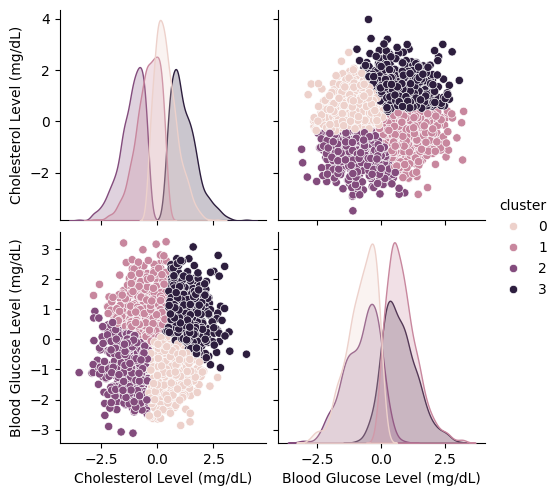

In [20]:
sns.pairplot(data=df_scaled[x_cols + ['cluster']], hue = 'cluster')
plt.show()

In [23]:
df_numerical.groupby('cluster').describe()[x_cols[0]]

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,834.000,243.674,12.454,224.619,234.415,241.564,250.981,299.843
1,813.000,223.648,13.378,164.538,215.196,225.230,234.207,244.014
2,678.000,205.778,13.349,148.812,198.156,208.295,216.290,224.810
3,675.000,262.996,14.175,242.784,252.313,259.830,270.980,331.301


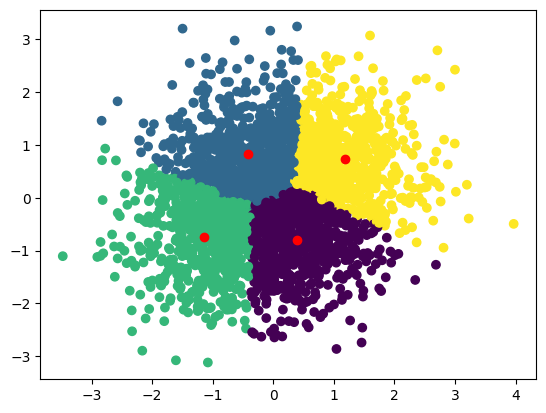

In [25]:
# Centroidy
plt.scatter(df_scaled[x_cols[0]], df_scaled[x_cols[1]], c=df_scaled['cluster'])
plt.scatter(x=k_means.cluster_centers_[:,0], y = k_means.cluster_centers_[:,1], color='red')
plt.show()

In [29]:
# Co się stanie, gdy nie wystandaryzuję danych?
x_cols = ['Cholesterol Level (mg/dL)', 'BMI']
k_means = KMeans(n_clusters=4, random_state=123).fit(df[x_cols])
df['cluster_2'] = k_means.labels_

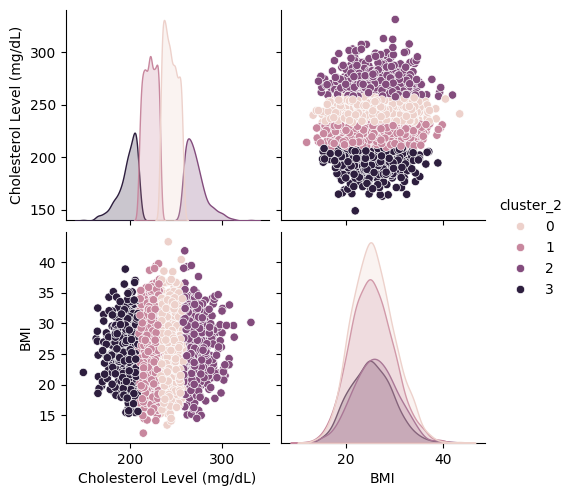

In [30]:
# Sprawdzenie - wykres
sns.pairplot(data=df[x_cols + ['cluster_2']], hue = 'cluster_2')
plt.show()

In [31]:
# Optymalna liczba klastrów
inertia = []
for i in range(2,10):
    k_means = KMeans(n_clusters=i, random_state=123).fit(df_scaled[x_cols])
    inertia.append(k_means.inertia_)

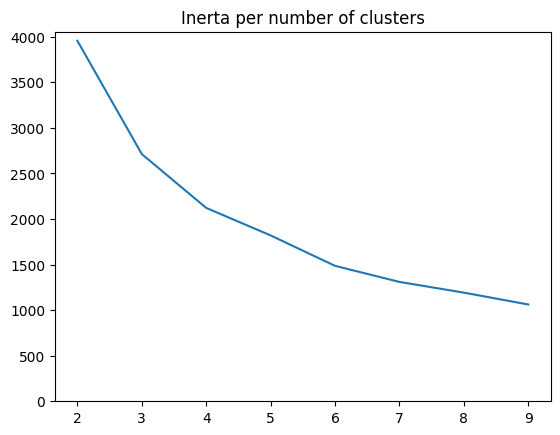

In [36]:
# wykres
plt.plot(range(2,10), inertia)
plt.title('Inerta per number of clusters')
plt.ylim(0,max(inertia)+100)
plt.show()